# 0.) Import and Clean data

In [56]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [59]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/bank-additional-full.csv", sep = ";")

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [62]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

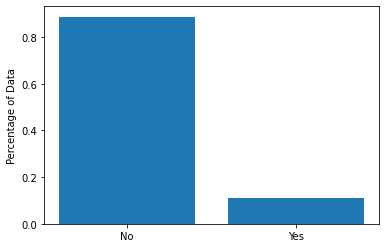

In [64]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [65]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [66]:
###############
###TRANSFORM###
###############

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state = 11)
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [67]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

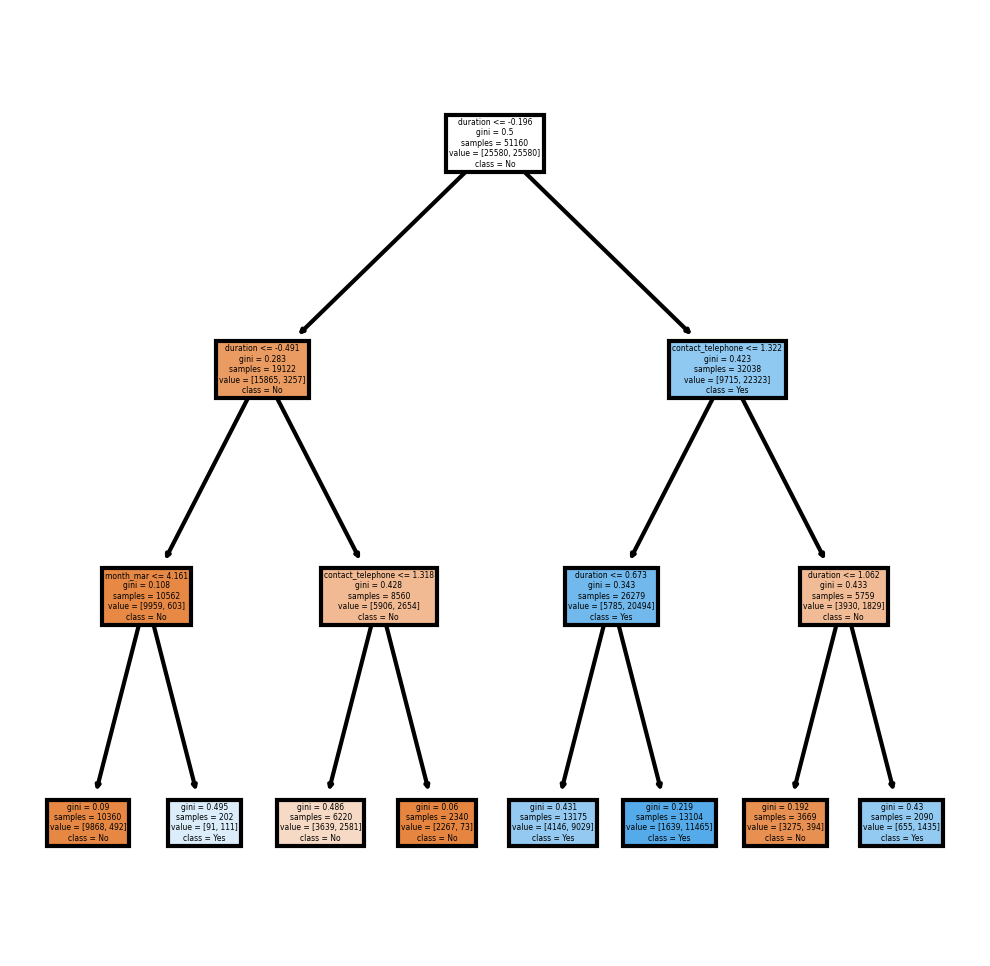

In [68]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
fig.savefig('image1.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [69]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

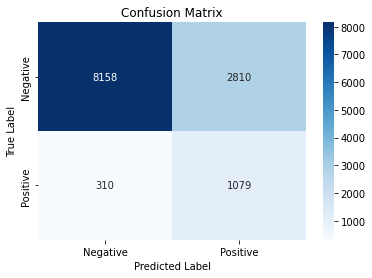

In [70]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [71]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7488872703730679


In [72]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

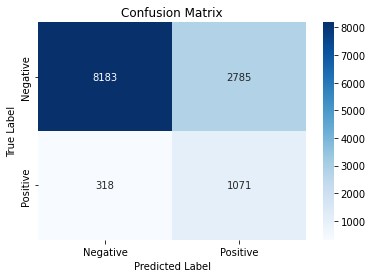

In [73]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

In [76]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

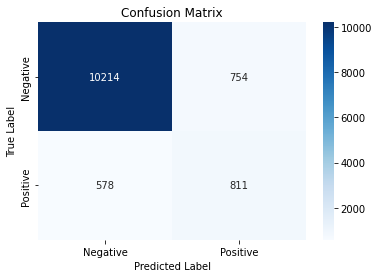

In [77]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [78]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

####IMPORT MORE BASE LEARNERS####
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier

from mlens.ensemble import SuperLearner

In [80]:
### SET YOUR BASE LEARNERS
base_learners = [LogisticRegression(),
                RandomForestClassifier(),
                KNeighborsClassifier(n_neighbors = 10),
                Lasso(),
                AdaBoostClassifier()]

super_learner = SuperLearner()
super_learner.add(base_learners)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
predictions = super_learner.predict(X_scaled)

In [81]:
### TRAIN YOUR METALEARNER
reg = LogisticRegression().fit(predictions, y_train)

In [82]:
### INTERPRET COEFFICIENTS
reg.coef_

array([[1.24051320e+00, 1.88091139e+00, 3.31101952e-05, 3.29513350e-01,
        1.33852126e+01]])

The coefficients represent the weighted effect of each base learner model on the super learner's output. The magnitude of the coefficient shows the relative importance of the base learner model in the super learner.

Therefore, the order of importance from greastest to least is: AdaBoost Classifier, Random Forest Classifier, Logistic Regression, Lasso, and K-Nearest Neighbors with k=10.

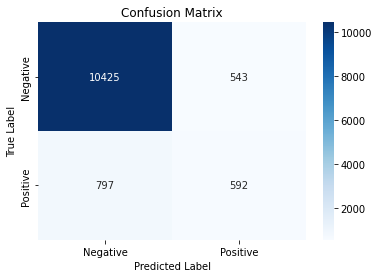

In [83]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
test_pred = super_learner.predict(X_test)
y_pred = reg.predict(test_pred)
cm_log = confusion_matrix(y_test, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
def sen(conf_matrix):
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  sensitivity = tp / (tp + fn)
  return sensitivity

In [86]:
def spec(conf_matrix):
  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  specificity = tn / (tn + fp)
  return specificity

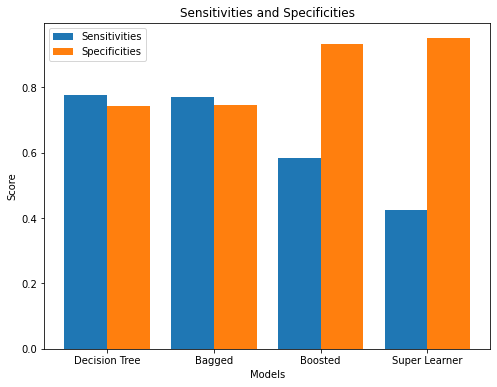

In [87]:
import matplotlib.pyplot as plt 
  
mod = ['Decision Tree','Bagged','Boosted','Super Learner']
sensitivities = [sen(conf_matrix) for conf_matrix in [cm_raw, cm_bag, cm_boost, cm_log]]
specificities = [spec(conf_matrix) for conf_matrix in [cm_raw, cm_bag, cm_boost, cm_log]]
  
x = np.arange(len(mod))

plt.figure(figsize= (8,6))
plt.bar(x - 0.2, sensitivities, 0.4, label = 'Sensitivities')
plt.bar(x + 0.2, specificities, 0.4, label = 'Specificities')
  
plt.xticks(x, mod)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Sensitivities and Specificities")
plt.legend()
plt.show()